In [1]:
from modules2 import *
from torch.optim import Adam
from  tqdm.notebook import tqdm
import matplotlib.animation as animation
import imageio
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch. optim.lr_scheduler import ExponentialLR

In [2]:
batch_size = 256
dataset = torchvision.datasets.FashionMNIST(root="C:/Users/ericy/Downloads", train = True, download = True, transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Lambda(lambda t: (t * 2) - 1)
]))
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [35]:
device = "cuda:0"
model = Unet(time_dim=200, dims=((18, 28), (28, 56), (56, 112)), channels=1)
model = model.to(device)

optimizer = Adam(model.parameters(), lr=1e-4)
scheduler = ExponentialLR(optimizer, gamma=0.99)

In [36]:
time_steps = 200
S = schedule(time_steps, device)

In [37]:
epochs = 100
L = []

for epoch in tqdm(range(epochs), desc="Epoch", position=0):
    for step, (batch, _) in enumerate(tqdm(loader, desc="Batch", position=1, leave=False)):
        optimizer.zero_grad()
        batch = batch.to(device)
        t = torch.randint(0, time_steps, (len(batch),), device=device).long()
        loss = S.loss(model, batch, t)
        loss.backward()
        optimizer.step()
        L.append(loss.detach().cpu())
        if step % 100 == 0:
            print("Epoch:", epoch, "Loss:", loss.item())

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 0 Loss: 0.4508330225944519
Epoch: 0 Loss: 0.3855646848678589
Epoch: 0 Loss: 0.23701415956020355


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 1 Loss: 0.16400597989559174
Epoch: 1 Loss: 0.07439219206571579
Epoch: 1 Loss: 0.06037282198667526


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 2 Loss: 0.06058280169963837
Epoch: 2 Loss: 0.0564865842461586
Epoch: 2 Loss: 0.05483442172408104


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 3 Loss: 0.05358324199914932
Epoch: 3 Loss: 0.05639805644750595
Epoch: 3 Loss: 0.05298382788896561


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 4 Loss: 0.05040799826383591
Epoch: 4 Loss: 0.05146026611328125
Epoch: 4 Loss: 0.04449800029397011


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 5 Loss: 0.05340973660349846
Epoch: 5 Loss: 0.0429961197078228
Epoch: 5 Loss: 0.04418950527906418


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 6 Loss: 0.043509822338819504
Epoch: 6 Loss: 0.03781328722834587
Epoch: 6 Loss: 0.045205894857645035


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 7 Loss: 0.04033105447888374
Epoch: 7 Loss: 0.04240938648581505
Epoch: 7 Loss: 0.04328266531229019


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 8 Loss: 0.04399719089269638
Epoch: 8 Loss: 0.040561895817518234
Epoch: 8 Loss: 0.03827061876654625


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 9 Loss: 0.039322808384895325
Epoch: 9 Loss: 0.04000425338745117
Epoch: 9 Loss: 0.04053761065006256


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 10 Loss: 0.04173330217599869
Epoch: 10 Loss: 0.03975191339850426
Epoch: 10 Loss: 0.037552155554294586


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 11 Loss: 0.03890116140246391
Epoch: 11 Loss: 0.039551105350255966
Epoch: 11 Loss: 0.04497591406106949


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 12 Loss: 0.03343159332871437
Epoch: 12 Loss: 0.03632757440209389
Epoch: 12 Loss: 0.03515226021409035


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 13 Loss: 0.047133445739746094
Epoch: 13 Loss: 0.04051751270890236
Epoch: 13 Loss: 0.03775479644536972


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 14 Loss: 0.03707917407155037
Epoch: 14 Loss: 0.039011310786008835
Epoch: 14 Loss: 0.0405304841697216


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 15 Loss: 0.037934958934783936
Epoch: 15 Loss: 0.0399552583694458
Epoch: 15 Loss: 0.03380952402949333


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 16 Loss: 0.03929361328482628
Epoch: 16 Loss: 0.0386517159640789
Epoch: 16 Loss: 0.04049654304981232


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 17 Loss: 0.038610849529504776
Epoch: 17 Loss: 0.03689724579453468
Epoch: 17 Loss: 0.0343865305185318


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 18 Loss: 0.03727627545595169
Epoch: 18 Loss: 0.0391407310962677
Epoch: 18 Loss: 0.028881806880235672


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 19 Loss: 0.03614617884159088
Epoch: 19 Loss: 0.03695422410964966
Epoch: 19 Loss: 0.03772038593888283


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 20 Loss: 0.03706267848610878
Epoch: 20 Loss: 0.03589635342359543
Epoch: 20 Loss: 0.0347491018474102


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 21 Loss: 0.03980477526783943
Epoch: 21 Loss: 0.03939417004585266
Epoch: 21 Loss: 0.03320727497339249


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 22 Loss: 0.034539517015218735
Epoch: 22 Loss: 0.03642413020133972
Epoch: 22 Loss: 0.03407987579703331


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 23 Loss: 0.03989270329475403
Epoch: 23 Loss: 0.035890720784664154
Epoch: 23 Loss: 0.03855573385953903


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 24 Loss: 0.036077529191970825
Epoch: 24 Loss: 0.03276756405830383
Epoch: 24 Loss: 0.034959662705659866


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 25 Loss: 0.03886118158698082
Epoch: 25 Loss: 0.0330209955573082
Epoch: 25 Loss: 0.03868847340345383


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 26 Loss: 0.03470795601606369
Epoch: 26 Loss: 0.035914886742830276
Epoch: 26 Loss: 0.03766734525561333


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 27 Loss: 0.038630180060863495
Epoch: 27 Loss: 0.03436256945133209
Epoch: 27 Loss: 0.040127452462911606


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 28 Loss: 0.03736157715320587
Epoch: 28 Loss: 0.0356997475028038
Epoch: 28 Loss: 0.03359932824969292


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 29 Loss: 0.034970905631780624
Epoch: 29 Loss: 0.034328997135162354
Epoch: 29 Loss: 0.03904323652386665


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 30 Loss: 0.036667350679636
Epoch: 30 Loss: 0.03739668428897858
Epoch: 30 Loss: 0.033799994736909866


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 31 Loss: 0.02986716665327549
Epoch: 31 Loss: 0.03784453868865967
Epoch: 31 Loss: 0.03486150503158569


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 32 Loss: 0.0348273403942585
Epoch: 32 Loss: 0.03109808824956417
Epoch: 32 Loss: 0.03346676379442215


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 33 Loss: 0.035672627389431
Epoch: 33 Loss: 0.035624049603939056
Epoch: 33 Loss: 0.035873547196388245


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 34 Loss: 0.03324338421225548
Epoch: 34 Loss: 0.0346071720123291
Epoch: 34 Loss: 0.03354150801897049


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 35 Loss: 0.03793222829699516
Epoch: 35 Loss: 0.0355474017560482
Epoch: 35 Loss: 0.03688737377524376


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 36 Loss: 0.03657274320721626
Epoch: 36 Loss: 0.040232475847005844
Epoch: 36 Loss: 0.036548979580402374


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 37 Loss: 0.03716542199254036
Epoch: 37 Loss: 0.03435968980193138
Epoch: 37 Loss: 0.03124849498271942


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 38 Loss: 0.03384670615196228
Epoch: 38 Loss: 0.0343945175409317
Epoch: 38 Loss: 0.03440603241324425


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 39 Loss: 0.0288380179554224
Epoch: 39 Loss: 0.03296057507395744
Epoch: 39 Loss: 0.03332095965743065


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 40 Loss: 0.033018313348293304
Epoch: 40 Loss: 0.03379194438457489
Epoch: 40 Loss: 0.035555511713027954


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 41 Loss: 0.03374983370304108
Epoch: 41 Loss: 0.035923223942518234
Epoch: 41 Loss: 0.03734726831316948


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 42 Loss: 0.033392284065485
Epoch: 42 Loss: 0.03450858220458031
Epoch: 42 Loss: 0.033828072249889374


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 43 Loss: 0.03396008536219597
Epoch: 43 Loss: 0.03837799280881882
Epoch: 43 Loss: 0.0377216637134552


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 44 Loss: 0.027789199724793434
Epoch: 44 Loss: 0.030357036739587784
Epoch: 44 Loss: 0.033117905259132385


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 45 Loss: 0.030776232481002808
Epoch: 45 Loss: 0.031402524560689926
Epoch: 45 Loss: 0.03340122848749161


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 46 Loss: 0.0347900390625
Epoch: 46 Loss: 0.03565111756324768
Epoch: 46 Loss: 0.03301104158163071


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 47 Loss: 0.03677434101700783
Epoch: 47 Loss: 0.03270586207509041
Epoch: 47 Loss: 0.03096882440149784


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 48 Loss: 0.0329907089471817
Epoch: 48 Loss: 0.033558446913957596
Epoch: 48 Loss: 0.02767029032111168


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 49 Loss: 0.034739162772893906
Epoch: 49 Loss: 0.029745344072580338
Epoch: 49 Loss: 0.03113831952214241


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 50 Loss: 0.03039960376918316
Epoch: 50 Loss: 0.030105900019407272
Epoch: 50 Loss: 0.03040825016796589


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 51 Loss: 0.033745914697647095
Epoch: 51 Loss: 0.03055761009454727
Epoch: 51 Loss: 0.032840289175510406


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 52 Loss: 0.0320516936480999
Epoch: 52 Loss: 0.030078308656811714
Epoch: 52 Loss: 0.03689412400126457


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 53 Loss: 0.03502369299530983
Epoch: 53 Loss: 0.03254793584346771
Epoch: 53 Loss: 0.03659476339817047


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 54 Loss: 0.03634573891758919
Epoch: 54 Loss: 0.03426365554332733
Epoch: 54 Loss: 0.03577931970357895


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 55 Loss: 0.032824449241161346
Epoch: 55 Loss: 0.032623082399368286
Epoch: 55 Loss: 0.03792824596166611


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 56 Loss: 0.028944574296474457
Epoch: 56 Loss: 0.032715585082769394
Epoch: 56 Loss: 0.03175392374396324


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 57 Loss: 0.031807612627744675
Epoch: 57 Loss: 0.0358395129442215
Epoch: 57 Loss: 0.033454377204179764


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 58 Loss: 0.03376396745443344
Epoch: 58 Loss: 0.03174594044685364
Epoch: 58 Loss: 0.0288124680519104


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 59 Loss: 0.03256262093782425
Epoch: 59 Loss: 0.0340891033411026
Epoch: 59 Loss: 0.03735719248652458


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 60 Loss: 0.03602691367268562
Epoch: 60 Loss: 0.02847953699529171
Epoch: 60 Loss: 0.027682147920131683


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 61 Loss: 0.0323590412735939
Epoch: 61 Loss: 0.02693830616772175
Epoch: 61 Loss: 0.03334777429699898


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 62 Loss: 0.03222722187638283
Epoch: 62 Loss: 0.03148103132843971
Epoch: 62 Loss: 0.03262510523200035


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 63 Loss: 0.03679116070270538
Epoch: 63 Loss: 0.03186013922095299
Epoch: 63 Loss: 0.03346461430191994


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 64 Loss: 0.03559117764234543
Epoch: 64 Loss: 0.027335062623023987
Epoch: 64 Loss: 0.02907244861125946


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 65 Loss: 0.030707819387316704
Epoch: 65 Loss: 0.031374406069517136
Epoch: 65 Loss: 0.03242373839020729


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 66 Loss: 0.03106118179857731
Epoch: 66 Loss: 0.036365993320941925
Epoch: 66 Loss: 0.037017494440078735


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 67 Loss: 0.032505519688129425
Epoch: 67 Loss: 0.028926029801368713
Epoch: 67 Loss: 0.035219572484493256


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 68 Loss: 0.03244924172759056
Epoch: 68 Loss: 0.034391749650239944
Epoch: 68 Loss: 0.03273692727088928


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 69 Loss: 0.03588682785630226
Epoch: 69 Loss: 0.030631672590970993
Epoch: 69 Loss: 0.03380782529711723


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 70 Loss: 0.03254205361008644
Epoch: 70 Loss: 0.03762307018041611
Epoch: 70 Loss: 0.0315525121986866


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 71 Loss: 0.029035618528723717
Epoch: 71 Loss: 0.031125275418162346
Epoch: 71 Loss: 0.03475113585591316


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 72 Loss: 0.029567090794444084
Epoch: 72 Loss: 0.03209429234266281
Epoch: 72 Loss: 0.034031812101602554


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 73 Loss: 0.03200935199856758
Epoch: 73 Loss: 0.02993418648838997
Epoch: 73 Loss: 0.03090018592774868


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 74 Loss: 0.029280951246619225
Epoch: 74 Loss: 0.029430676251649857
Epoch: 74 Loss: 0.03388470038771629


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 75 Loss: 0.03221922740340233
Epoch: 75 Loss: 0.03234036639332771
Epoch: 75 Loss: 0.031861864030361176


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 76 Loss: 0.03030550666153431
Epoch: 76 Loss: 0.033681679517030716
Epoch: 76 Loss: 0.027222992852330208


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 77 Loss: 0.031635433435440063
Epoch: 77 Loss: 0.030303511768579483
Epoch: 77 Loss: 0.030072269961237907


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 78 Loss: 0.03076738491654396
Epoch: 78 Loss: 0.03183789923787117
Epoch: 78 Loss: 0.03819836303591728


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 79 Loss: 0.03115278109908104
Epoch: 79 Loss: 0.02913530357182026
Epoch: 79 Loss: 0.032238543033599854


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 80 Loss: 0.03005935624241829
Epoch: 80 Loss: 0.02727990224957466
Epoch: 80 Loss: 0.03188738599419594


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 81 Loss: 0.030103391036391258
Epoch: 81 Loss: 0.03245575353503227
Epoch: 81 Loss: 0.034126441925764084


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 82 Loss: 0.03389637917280197
Epoch: 82 Loss: 0.03350677341222763
Epoch: 82 Loss: 0.03476977348327637


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 83 Loss: 0.03430023044347763
Epoch: 83 Loss: 0.03072206676006317
Epoch: 83 Loss: 0.03073311783373356


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 84 Loss: 0.03497312590479851
Epoch: 84 Loss: 0.031282104551792145
Epoch: 84 Loss: 0.034010495990514755


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 85 Loss: 0.02821989543735981
Epoch: 85 Loss: 0.030049286782741547
Epoch: 85 Loss: 0.03232311084866524


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 86 Loss: 0.03023415617644787
Epoch: 86 Loss: 0.02641034498810768
Epoch: 86 Loss: 0.028646906837821007


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 87 Loss: 0.035312242805957794
Epoch: 87 Loss: 0.035283684730529785
Epoch: 87 Loss: 0.029818300157785416


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 88 Loss: 0.028437629342079163
Epoch: 88 Loss: 0.03593521937727928
Epoch: 88 Loss: 0.03181983530521393


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 89 Loss: 0.031494561582803726
Epoch: 89 Loss: 0.030194690451025963
Epoch: 89 Loss: 0.03034108877182007


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 90 Loss: 0.031119454652071
Epoch: 90 Loss: 0.02770734205842018
Epoch: 90 Loss: 0.03713028132915497


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 91 Loss: 0.03194108232855797
Epoch: 91 Loss: 0.030157268047332764
Epoch: 91 Loss: 0.030906451866030693


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 92 Loss: 0.029148705303668976
Epoch: 92 Loss: 0.030832065269351006
Epoch: 92 Loss: 0.033018723130226135


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 93 Loss: 0.030896998941898346
Epoch: 93 Loss: 0.029632363468408585
Epoch: 93 Loss: 0.03267383202910423


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 94 Loss: 0.03278343006968498
Epoch: 94 Loss: 0.03347814455628395
Epoch: 94 Loss: 0.03232402727007866


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 95 Loss: 0.03498372808098793
Epoch: 95 Loss: 0.03460726886987686
Epoch: 95 Loss: 0.028735879808664322


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 96 Loss: 0.030290046706795692
Epoch: 96 Loss: 0.028782935813069344
Epoch: 96 Loss: 0.030089333653450012


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 97 Loss: 0.031106919050216675
Epoch: 97 Loss: 0.033734630793333054
Epoch: 97 Loss: 0.031396426260471344


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 98 Loss: 0.0283772312104702
Epoch: 98 Loss: 0.030902676284313202
Epoch: 98 Loss: 0.03486143797636032


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 99 Loss: 0.031137701123952866
Epoch: 99 Loss: 0.026450540870428085
Epoch: 99 Loss: 0.03328864276409149


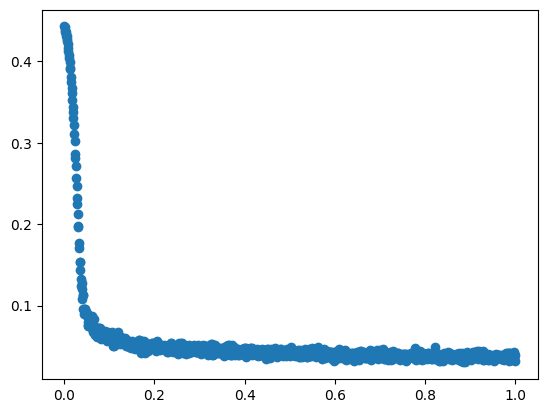

In [6]:
plt.scatter(np.linspace(0,1,len(L)), L)

In [63]:
M = S.sample(model, device=device, time_steps=200)
N = []
for i in M:
    #N.append((np.clip((i.reshape(28, 28) + 1)*0.5, 0, 1)*255).astype(np.uint8))
    N.append((i.reshape(28, 28)).astype(np.uint8))
N = np.array(N[::2]).astype(np.uint8)
imageio.mimwrite("output9.gif", N, 'GIF')